In [26]:
from openmm import unit

import math

In [27]:
# Variables
L_C = 1e-6 * unit.molar
L_E = 0 * unit.elementary_charge

In [28]:
# Constants
T = 298 * unit.kelvin
R = 8.314 * unit.joule / unit.mole / unit.kelvin
Kw = 1e-14
Lit_to_Mol = 55.55 * unit.mole / unit.liter

In [32]:
dG0w = R * T * math.log(Kw)
H2O_C = Lit_to_Mol * 1 * unit.mole / (L_C * (1 + 2 * Kw))

# System: 1L, aH2O, bH3Op, cOHm


OHm_C = 1e-7 * unit.molar
H3Op_C = 1e-7 * unit.molar

In [33]:
H2O_C

Quantity(value=55549999.99999889, unit=mole**2/(liter*molar))

In [24]:
dG0w

Quantity(value=-79867.48495627222, unit=joule/mole)

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 700, 500

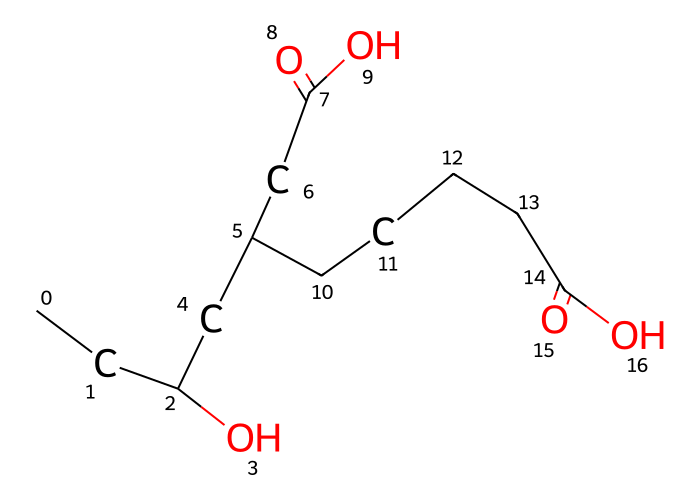

In [23]:
m = Chem.MolFromSmiles("CCC(O)CC(CC(=O)O)CCCCC(=O)O")
m = Chem.AddHs(m)
AllChem.EmbedMolecule(m)
m = Chem.RemoveHs(m)
m

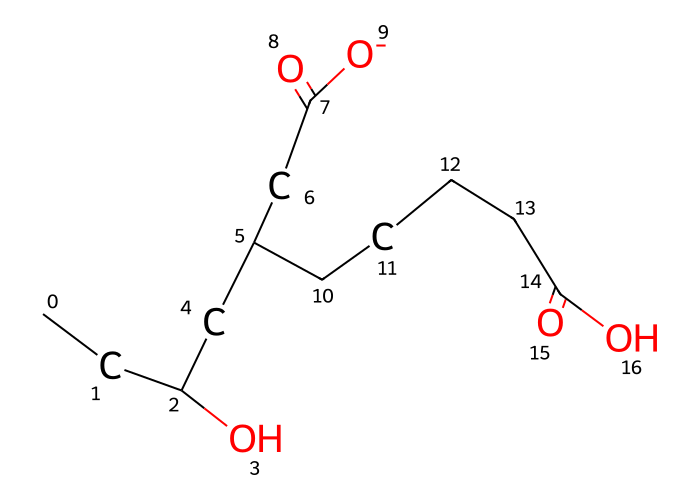

In [29]:
ionized_idx = 9
mm = Chem.Mol(m)
mm.GetAtomWithIdx(ionized_idx).SetFormalCharge(-1)
mm.GetAtomWithIdx(ionized_idx).SetNumExplicitHs(0)
Chem.MolToPDBFile(Chem.AddHs(mm, addCoords=True), "tmp.pdb")
mm

In [40]:
mm = Chem.AddHs(Chem.MolFromSmiles("[OH3+]"), addCoords=True)
AllChem.EmbedMolecule(mm)
Chem.MolToPDBFile(Chem.AddHs(mm, addCoords=True), "tmp.pdb")

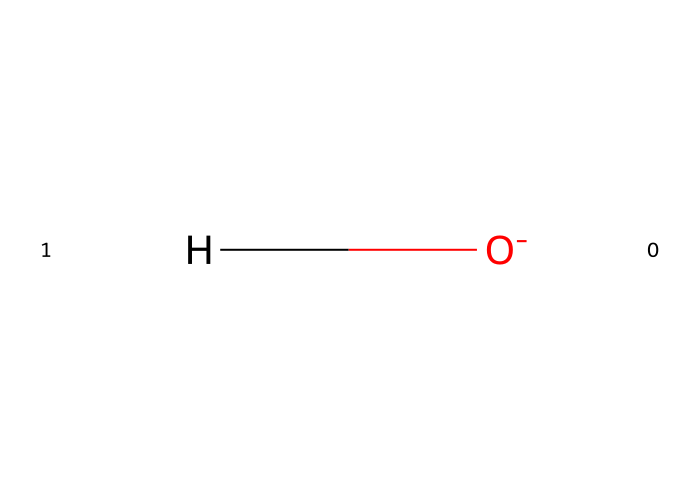

In [38]:
mm